In [240]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from collections import Counter
from ast import literal_eval
import itertools

In [241]:
# reading datasets
bb_usage = pd.read_csv("data/user_profile/BB_Usage_Categorical.csv")
voice_incoming_usage = pd.read_csv("data/user_profile/VOICE_INCOMING_Usage_Categorical.csv")
voice_outgoing_usage = pd.read_csv("data/user_profile/VOICE_OUTGOING_Usage_Categorical.csv")
voice_IDD_incoming_usage = pd.read_csv("data/user_profile/VOICE_IDD_Incoming_Usage_Categorical.csv")
voice_IDD_outgoing_usage = pd.read_csv("data/user_profile/VOICE_IDD_Outgoing_Usage_Categorical.csv")
peo_tv_usage = pd.read_csv("data/user_profile/PEO_TV_Usage_Categorical.csv")

In [242]:
# locations
user_location = pd.read_csv("data/user_profile/User_Locations.csv")
lte_location = pd.read_csv("data/user_profile/User_LTE_Locations.csv")

In [314]:
# user demographics
demo_df = pd.read_csv("data/user_profile/user_demographics.csv")

In [441]:
# VAS
megaline_agg_df = pd.read_csv("data/user_profile/Megaline_Packages.csv")
ftth_agg_df = pd.read_csv("data/user_profile/FTTH_Packages.csv")
lte_agg_df = pd.read_csv("data/user_profile/LTE_Packages.csv")
vas_agg_df = pd.read_csv("data/user_profile/Paid_Vas_Packages.csv")
package_df = pd.read_csv("data/user_profile/Package_Final_list.csv")

/Users/chiranhewawitharana/mambaforge/envs/mactf/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [245]:
# Subscription Types
sub_df = pd.read_csv("data/user_profile/User_Subscription_Map.csv")
promo_change_df = pd.read_csv("data/user_profile/User_Subscription_Changes.csv")

In [246]:
#Extra GB Usage BB
extra_GB_df = pd.read_csv("data/user_profile/BB_extra_GB_usage.csv")

In [247]:
# Peo TV Extra Channel Usage
extra_Peo_df = pd.read_csv("data/user_profile/Peo_Extra_Peo_Usage.csv")

In [248]:
# All customers reference
all_users_df = pd.read_csv("data/user_profile/account_no_map_all.csv")
agg_users_df = pd.read_csv("data/user_profile/account_no_map_agg.csv")

In [249]:
# User BB Package Map
user_bb_package_df = pd.read_csv("data/user_profile/User_BB_Package_Map.csv")
user_peo_packages_df = pd.read_csv("data/user_profile/Peo_TV_Users_Packages.csv")

In [250]:
# Payment and billing details
payments_df = pd.read_csv("data/user_profile/account_no_map_agg.csv")
billing_df = pd.read_csv("data/user_profile/User_Billing_Details.csv")

# Data perapration

In [251]:
user_bb_package_df.drop(["Unnamed: 0"],axis=1,inplace=True)
user_bb_package_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32945 entries, 0 to 32944
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACCOUNT_NUM.hash  32945 non-null  object
 1   BB_Package        32945 non-null  object
dtypes: object(2)
memory usage: 514.9+ KB


In [252]:
user_peo_packages_df.drop(["Unnamed: 0"],axis=1,inplace=True)
user_peo_packages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24262 entries, 0 to 24261
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_source.hash  24262 non-null  object
 1   Peo_TV_Package     24262 non-null  object
dtypes: object(2)
memory usage: 379.2+ KB


In [253]:
extra_GB_df.drop(["Unnamed: 0"],axis=1,inplace=True)
extra_Peo_df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [254]:
extra_GB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196207 entries, 0 to 196206
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ACCOUNT_NUM.hash  196207 non-null  object
 1   Month_Subscribed  196207 non-null  object
 2   Rental            196207 non-null  int64 
 3   BB_Package        196207 non-null  object
 4   GB_AMOUNT         196207 non-null  int64 
 5   Hour_Subscribed   196207 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 9.0+ MB


In [255]:
extra_Peo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151902 entries, 0 to 151901
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ACCOUNT_NUM.hash  151902 non-null  object
 1   Month_Subscribed  151902 non-null  object
 2   Rental            151902 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.5+ MB


In [256]:
all_users_df.drop(["Unnamed: 0"],axis=1,inplace=True)
all_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161886 entries, 0 to 161885
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   event_source.hash  161886 non-null  object
 1   ACCOUNT_NUM.hash   161886 non-null  object
 2   CR.hash            161886 non-null  object
dtypes: object(3)
memory usage: 3.7+ MB


In [257]:
bb_usage.rename(columns={'Unnamed: 0':'event_source.hash'}, inplace="True")
bb_usage = bb_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled']]
#bb_usage.drop_duplicates("event_source.hash", inplace=True)
bb_usage.drop([0,1], axis=0, inplace=True)
# bb_usage

In [258]:
voice_incoming_usage = voice_incoming_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_onnet_incoming_usage.drop_duplicates("event_source.hash", inplace=True)
# voice_onnet_incoming_usage

In [259]:
voice_outgoing_usage = voice_outgoing_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier']]
#voice_onnet_outgoing_usage.drop_duplicates("event_source.hash", inplace=True)
# voice_onnet_outgoing_usage

In [260]:
voice_IDD_incoming_usage = voice_IDD_incoming_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier','incoming_country']]
voice_IDD_incoming_usage.rename(columns={"incoming_country":"IDD_incoming_country"}, inplace=True)
#voice_IDD_incoming_usage.drop_duplicates("event_source.hash", inplace=True)
#voice_IDD_incoming_usage

In [261]:
voice_IDD_outgoing_usage = voice_IDD_outgoing_usage[['event_source.hash','Usage_Rating_Categorical','Usage_Rating_Scaled','Outlier',"outgoing_country"]]
voice_IDD_outgoing_usage.rename(columns={"outgoing_country":"IDD_outgoing_country"}, inplace=True)
#voice_IDD_outgoing_usage.drop_duplicates("event_source.hash", inplace=True)
#voice_IDD_outgoing_usage

In [262]:
peo_tv_usage = peo_tv_usage[['event_source.hash','Peo_TV_Package','Usage_Rating_Categorical','Usage_Rating_Scaled']]
#peo_tv_usage.drop_duplicates("Phone_Number.hash", inplace=True)
#peo_tv_usage

In [431]:
def clean_lists(col):
    col = list(set(literal_eval(col)))
    new_col = []
    for i in col:
        if not isinstance(i, float):
            new_col.append(i)
    if len(new_col) == 0:
        return "NO INFO"
    if len(new_col) == 1:
        return new_col[0]
    else:
        return new_col

In [264]:
user_location.drop(["DISPLAYNAME.hash","Unnamed: 0"],axis=1,inplace=True)
all_users_locations_df = user_location.merge(all_users_df,how="left",on="CR.hash")
all_users_locations_df.drop(["CR.hash"],axis=1,inplace=True)
all_users_locations_df = all_users_locations_df.merge(lte_location[["event_source.hash","Location_Node"]],how="left",on="event_source.hash")
all_users_locations_df.rename(columns={"SERVICE_TYPE":"Package_Type_and_Medium","MODEL":"Model","CIRCUIT_STATUS":"Service_Status"},inplace=True)
all_users_locations_df.drop_duplicates("event_source.hash", inplace=True)
all_users_locations_df  = all_users_locations_df[["ACCOUNT_NUM.hash","Location_Identifier","Location_Node","Package_Type_and_Medium","Model","Service_Status"]]
all_users_locations_df = all_users_locations_df.groupby("ACCOUNT_NUM.hash").agg(list)

In [265]:
for col in all_users_locations_df.columns:
    all_users_locations_df[col] = all_users_locations_df[col].apply(lambda x: clean_lists(x))

In [315]:
demo_df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [442]:
megaline_agg_df.drop(["Unnamed: 0"], axis=1,inplace=True)
ftth_agg_df.drop(["Unnamed: 0"], axis=1,inplace=True)
lte_agg_df.drop(["Unnamed: 0"], axis=1,inplace=True)
vas_agg_df.drop(["Unnamed: 0"], axis=1,inplace=True)
package_df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [576]:
megaline_agg_df.rename(columns={"MEDIUM":"Megaline_Medium"},inplace=True)
ftth_agg_df.rename(columns={"MEDIUM":"FTTH_Medium"},inplace=True)
lte_agg_df.rename(columns={"MEDIUM":"LTE_Medium"},inplace=True)
vas_agg_df.rename(columns={"MEDIUM":"VAS_Medium"},inplace=True)

In [444]:
for col in megaline_agg_df.columns[1:]:
    megaline_agg_df[col] = megaline_agg_df[col].apply(lambda x: clean_lists(x))

In [445]:
for col in ftth_agg_df.columns[1:]:
    ftth_agg_df[col] = ftth_agg_df[col].apply(lambda x: clean_lists(x))

In [448]:
for col in lte_agg_df.columns[1:]:
    lte_agg_df[col] = lte_agg_df[col].apply(lambda x: clean_lists(x))

In [450]:
for col in vas_agg_df.columns[1:]:
    vas_agg_df[col] = vas_agg_df[col].apply(lambda x: clean_lists(x))

In [268]:
agg_users_df.drop(["Unnamed: 0"], axis=1,inplace=True)
sub_df.drop(["Unnamed: 0"], axis=1,inplace=True)
promo_change_df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [269]:
payments_df.drop(["Unnamed: 0"], axis=1,inplace=True)
billing_df.drop(["Unnamed: 0"], axis=1,inplace=True)

#### Merging BB Packages

In [270]:
user_bb_package_df = user_bb_package_df.groupby("ACCOUNT_NUM.hash").agg(list)
for col in user_bb_package_df.columns:
    user_bb_package_df[col] = user_bb_package_df[col].apply(lambda x: clean_lists(x))

## Mapping Acc No to Usage DFs

In [271]:
peo_tv_usage = peo_tv_usage.merge(all_users_df, how="left",on="event_source.hash")
peo_tv_usage = peo_tv_usage[peo_tv_usage['ACCOUNT_NUM.hash'].notna()]
peo_tv_usage.drop(["event_source.hash","CR.hash"],axis=1,inplace=True)

In [272]:
voice_IDD_outgoing_usage = voice_IDD_outgoing_usage.merge(all_users_df, how="left",on="event_source.hash")
voice_IDD_outgoing_usage = voice_IDD_outgoing_usage[voice_IDD_outgoing_usage['ACCOUNT_NUM.hash'].notna()]
voice_IDD_outgoing_usage.drop(["event_source.hash","CR.hash"],axis=1,inplace=True)

In [273]:
voice_IDD_incoming_usage = voice_IDD_incoming_usage.merge(all_users_df, how="left",on="event_source.hash")
voice_IDD_incoming_usage = voice_IDD_incoming_usage[voice_IDD_incoming_usage['ACCOUNT_NUM.hash'].notna()]
voice_IDD_incoming_usage.drop(["event_source.hash","CR.hash"],axis=1,inplace=True)

In [274]:
voice_outgoing_usage = voice_outgoing_usage.merge(all_users_df, how="left",on="event_source.hash")
voice_outgoing_usage = voice_outgoing_usage[voice_outgoing_usage['ACCOUNT_NUM.hash'].notna()]
voice_outgoing_usage.drop(["event_source.hash","CR.hash"],axis=1,inplace=True)

In [275]:
voice_incoming_usage = voice_incoming_usage.merge(all_users_df, how="left",on="event_source.hash")
voice_incoming_usage = voice_incoming_usage[voice_incoming_usage['ACCOUNT_NUM.hash'].notna()]
voice_incoming_usage.drop(["event_source.hash","CR.hash"],axis=1,inplace=True)
voice_incoming_usage = voice_incoming_usage[["ACCOUNT_NUM.hash","Usage_Rating_Categorical","Usage_Rating_Scaled","Outlier"]]

In [276]:
bb_usage = bb_usage.merge(all_users_df, how="left",on="event_source.hash")
bb_usage = bb_usage[bb_usage['ACCOUNT_NUM.hash'].notna()]
bb_usage.drop(["event_source.hash","CR.hash"],axis=1,inplace=True)
bb_usage = bb_usage.merge(user_bb_package_df, how = "left", on="ACCOUNT_NUM.hash")
bb_usage.drop_duplicates("ACCOUNT_NUM.hash", keep="last", inplace=True)

In [277]:
# user location 
print(bb_usage.shape)
print(voice_incoming_usage.shape)
print(voice_outgoing_usage.shape)
print(all_users_locations_df.shape) # merging begins with this
print(voice_IDD_outgoing_usage.shape)
print(voice_IDD_incoming_usage.shape)
print(peo_tv_usage.shape)

(41731, 4)
(44745, 4)
(43878, 4)
(44441, 5)
(5330, 5)
(11255, 5)
(21102, 4)


In [316]:
demo_df.drop(["event_source.hash","CR.hash"],axis=1, inplace=True)

# User Profile : Usage

In [577]:
usage_df = voice_incoming_usage.merge(all_users_locations_df,how='left', on='ACCOUNT_NUM.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'Voice_INCOMING_Categorical',
                         'Usage_Rating_Scaled':'Voice_INCOMING_Scaled','Outlier':'Voice_INCOMING_Outlier'}, inplace="True")
usage_df.drop_duplicates("ACCOUNT_NUM.hash",inplace=True)

In [578]:
usage_df = usage_df.merge(voice_outgoing_usage,how='left', on='ACCOUNT_NUM.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'Voice_OUTGOING_Categorical','Usage_Rating_Scaled':'Voice_OUTGOING_Scaled','Outlier':'Voice_OUTGOING_Outlier'}, inplace="True")
usage_df.drop_duplicates("ACCOUNT_NUM.hash",inplace=True)

In [579]:
usage_df = usage_df.merge(voice_IDD_incoming_usage,how='left', on='ACCOUNT_NUM.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'IDD_INCOMING_Categorical','Usage_Rating_Scaled':'IDD_INCOMING_Scaled','Outlier':'IDD_INCOMING_Outlier'}, inplace="True")
usage_df.drop_duplicates("ACCOUNT_NUM.hash",inplace=True)

In [580]:
usage_df = usage_df.merge(voice_IDD_outgoing_usage,how='left', on='ACCOUNT_NUM.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'IDD_OUTGOING_Categorical','Usage_Rating_Scaled':'IDD_OUTGOING_Scaled','Outlier':'IDD_OUTGOING_Outlier'}, inplace="True")
usage_df.drop_duplicates("ACCOUNT_NUM.hash",inplace=True)

In [581]:
usage_df = usage_df.merge(peo_tv_usage,how='left', on='ACCOUNT_NUM.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'PEO_TV_Categorical','Usage_Rating_Scaled':'PEO_TV_Scaled'}, inplace="True")
usage_df.drop_duplicates("ACCOUNT_NUM.hash",inplace=True)

In [582]:
# merege BB usage
usage_df = usage_df.merge(bb_usage,how='left', on='ACCOUNT_NUM.hash')
usage_df.rename(columns={'Usage_Rating_Categorical':'BB_Categorical','Usage_Rating_Scaled':'BB_Scaled'}, inplace="True")
usage_df.drop_duplicates("ACCOUNT_NUM.hash",inplace=True)

# Adding New Data

### Adding demographics

In [583]:
usage_df = usage_df.merge(demo_df,how='left', on='ACCOUNT_NUM.hash')

In [584]:
usage_df[["BIRTH_YEAR","AGE"]].describe()

BIRTH_YEAR           AGE
count  41769.000000  41769.000000
mean    1966.691685     54.308315
std       14.003570     14.003570
min     1922.000000     17.000000
25%     1957.000000     44.000000
50%     1967.000000     54.000000
75%     1977.000000     64.000000
max     2004.000000     99.000000

<AxesSubplot:ylabel='Density'>

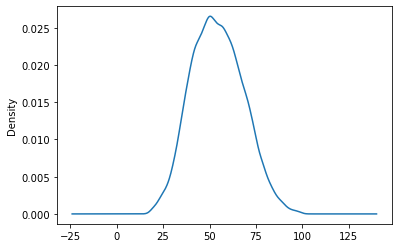

In [585]:
usage_df["AGE"].plot(kind = 'density')

<AxesSubplot:ylabel='Density'>

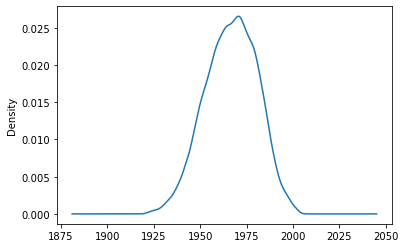

In [586]:
usage_df["BIRTH_YEAR"].plot(kind = 'density')

### Demographic Information

- 41769 users have demographic info (age, Birth Year, Gender)
- Users born from **1922**-2004 
- Age vary from 17 y.o. to **99 y.o**
- Mean Age - 54 y.o
- 75% of users are less than 65 y.o.
- Mostly middle aged, and aged customers

## Voice Usage Bins

In [587]:
usage_df["Voice_INCOMING_Categorical"].value_counts()

LOW       35636
MEDIUM     8667
HIGH        296
Name: Voice_INCOMING_Categorical, dtype: int64

In [588]:
def voice_bin(incoming,outgoing):
    if incoming=="LOW" and outgoing=="LOW":
        return "LOW"
    if incoming=="HIGH" and outgoing=="HIGH":
        return "HIGH"
    if (incoming=="HIGH" and outgoing=="MEDIUM") or (incoming=="MEDIUM" and outgoing=="HIGH"):
        return "HIGH"
    if incoming=="MEDIUM" and outgoing=="MEDIUM":
        return "MEDIUM"
    if (incoming=="MEDIUM" and outgoing=="LOW") or (incoming=="LOW" and outgoing=="MEDIUM"):
        return "LOW"
    if (incoming=="LOW" and outgoing=="HIGH") or (incoming=="HIGH" and outgoing=="LOW"):
        return "MEDIUM"
    if (isinstance(incoming,float) and not isinstance(outgoing,float)) or (not isinstance(incoming,float) and isinstance(outgoing,float)):
        return "LOW"
#     if (isinstance(incoming,float) and isinstance(outgoing,float)):
#         return "NO"

In [589]:
# test
voice_bin("LOW","HIGH")

'MEDIUM'

In [590]:
usage_df["Voice_Overall_Categorical"] = usage_df.apply(lambda x: voice_bin(x["Voice_INCOMING_Categorical"], x["Voice_OUTGOING_Categorical"]), axis=1)

In [591]:
usage_df["IDD_Overall_Categorical"] = usage_df.apply(lambda x: voice_bin(x["IDD_INCOMING_Categorical"], x["IDD_OUTGOING_Categorical"]), axis=1)

In [592]:
def voice_overall_bin(call_usage):
    counts = Counter(call_usage)
    if counts["LOW"] > 1:
        return "LOW"
    elif counts["HIGH"] > 1:
        return "HIGH"
    elif counts["MEDIUM"] > 1:
        return "MEDIUM"
    elif counts["LOW"] == 1 and counts["MEDIUM"] == 1 and counts["HIGH"] == 1:
        return "MEDIUM"
    elif counts["LOW"] == 1 and counts["MEDIUM"] == 1:
        return "LOW"
    elif counts["MEDIUM"] == 1 and counts["HIGH"] == 1:
        return "MEDIUM"

In [593]:
# test
voice_overall_bin(["HIGH","HIGH","NO"])

'HIGH'

In [594]:
usage_df["VOICE_Categorical"] = usage_df.apply(lambda x: voice_overall_bin([ x["Voice_Overall_Categorical"], x["IDD_Overall_Categorical"]]), axis=1)

In [595]:
usage_df[(usage_df["VOICE_Categorical"] == "NO")]

Empty DataFrame
Columns: [ACCOUNT_NUM.hash, Voice_INCOMING_Categorical, Voice_INCOMING_Scaled, Voice_INCOMING_Outlier, Location_Identifier, Location_Node, Package_Type_and_Medium, Model, Service_Status, Voice_OUTGOING_Categorical, Voice_OUTGOING_Scaled, Voice_OUTGOING_Outlier, IDD_INCOMING_Categorical, IDD_INCOMING_Scaled, IDD_INCOMING_Outlier, IDD_incoming_country, IDD_OUTGOING_Categorical, IDD_OUTGOING_Scaled, IDD_OUTGOING_Outlier, IDD_outgoing_country, Peo_TV_Package, PEO_TV_Categorical, PEO_TV_Scaled, BB_Categorical, BB_Scaled, BB_Package, GENDER, BIRTH_YEAR, AGE, Voice_Overall_Categorical, IDD_Overall_Categorical, VOICE_Categorical]
Index: []

[0 rows x 32 columns]

## Subscrition Types

In [596]:
usage_df = usage_df.merge(sub_df,how='left',on=["ACCOUNT_NUM.hash"])

In [597]:
def check_product_level(voice,bb,tv):
    if not isinstance(voice,float): 
        if isinstance(bb,float) and isinstance(tv,float):
            return "SINGLE_PLAY"
        if not isinstance(bb,float) and isinstance(tv,float):
            return "DOUBLE_PLAY_BV"
        if isinstance(bb,float) and not isinstance(tv,float):
            return "DOUBLE_PLAY_PV"
        if not isinstance(bb,float) and not isinstance(tv,float):
            return "TRIPLE_PLAY"

In [598]:
usage_df["Play_Type"] = usage_df.apply(lambda x: check_product_level(x["VOICE_Categorical"], x["BB_Categorical"], x["PEO_TV_Categorical"]), axis=1)

In [599]:
usage_df["Play_Type"].value_counts()

DOUBLE_PLAY_BV    16575
TRIPLE_PLAY       15626
SINGLE_PLAY        7749
DOUBLE_PLAY_PV     4649
Name: Play_Type, dtype: int64

In [600]:
# play usage
def play_usage(usage):
    if len(usage)>2:
        new_usage=[]
        for el in usage:
            if isinstance(el,float) or el=="nan" or el==None:
                new_usage.append("NO_INFO")
            else:
                new_usage.append(el)
        return [f"VOICE_{new_usage[0]}", f"BB_{new_usage[1]}", f"TV_{new_usage[2]}"]
    else:
        return "ERR"

In [601]:
# test
play_usage(["LOW","HIGH","LOW"])

['VOICE_LOW', 'BB_HIGH', 'TV_LOW']

In [602]:
usage_df["Sub_Usage"] = usage_df.apply(lambda x: play_usage([x["VOICE_Categorical"], x["BB_Categorical"], x["PEO_TV_Categorical"]]), axis=1)

In [603]:
usage_df[["Sub_Type","Play_Type"]].value_counts()

Sub_Type        Play_Type     
TRIPLE_PLAY     TRIPLE_PLAY       3829
DOUBLE_PLAY_BV  DOUBLE_PLAY_BV    2802
SINGLE_PLAY     SINGLE_PLAY       2691
DOUBLE_PLAY_PV  DOUBLE_PLAY_PV    1038
                TRIPLE_PLAY        927
TRIPLE_PLAY     DOUBLE_PLAY_PV     851
SINGLE_PLAY     DOUBLE_PLAY_BV     764
DOUBLE_PLAY_BV  SINGLE_PLAY        507
TRIPLE_PLAY     DOUBLE_PLAY_BV     348
                SINGLE_PLAY        165
DOUBLE_PLAY_BV  TRIPLE_PLAY        124
DOUBLE_PLAY_PV  SINGLE_PLAY        104
SINGLE_PLAY     TRIPLE_PLAY         74
4G              DOUBLE_PLAY_BV      68
DOUBLE_PLAY_PV  DOUBLE_PLAY_BV      61
SINGLE_PLAY     DOUBLE_PLAY_PV      32
DOUBLE_PLAY_BV  DOUBLE_PLAY_PV      23
4G              SINGLE_PLAY          4
dtype: int64

In [604]:
def check_sub_type(sub):
    if isinstance(sub, float):
        return "Assumed"
    else:
        return "Actual"

In [605]:
usage_df["Sub_Type_State"]=usage_df["Sub_Type"].apply(lambda x: check_sub_type(x))

In [606]:
def merge_sub_types(sub1,sub2):
    if isinstance(sub1, float):
        return sub2
    else:
        return sub1

In [607]:
usage_df["Sub_Type"] = usage_df.apply(lambda x: merge_sub_types(x["Sub_Type"], x["Play_Type"]), axis=1)

In [608]:
usage_df.drop(["Play_Type"],axis=1,inplace=True)

In [609]:
usage_df["Sub_Type_State"].value_counts()

Assumed    30187
Actual     14412
Name: Sub_Type_State, dtype: int64

In [610]:
usage_df["Sub_Type"].value_counts()

DOUBLE_PLAY_BV    15988
TRIPLE_PLAY       15865
SINGLE_PLAY        7839
DOUBLE_PLAY_PV     4835
4G                   72
Name: Sub_Type, dtype: int64

### Note

- Actual Subscription information - for **14412** Subscribers
- Assumed on usage - **30187**

### Wait! Contradiction??

In [611]:
usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_PV")]["BB_Categorical"].value_counts()

LOW       687
MEDIUM    239
HIGH       62
Name: BB_Categorical, dtype: int64

In [612]:
usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY")]["BB_Categorical"].value_counts()

LOW       637
MEDIUM    136
HIGH       65
Name: BB_Categorical, dtype: int64

In [613]:
usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY")]["PEO_TV_Categorical"].value_counts()

LOW       51
MEDIUM    39
HIGH      16
Name: PEO_TV_Categorical, dtype: int64

In [614]:
usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_BV")]["PEO_TV_Categorical"].value_counts()

MEDIUM    61
LOW       58
HIGH      28
Name: PEO_TV_Categorical, dtype: int64

### Why??
- These subscribers may have used the services within 2019-01 to 2021-01 and however downgraded thier services by the time of BSS dataset has generated

### Dropping contradictory subscribers

In [615]:
usage_df = usage_df.drop(usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_PV") & (usage_df["BB_Categorical"].notna())].index)

In [616]:
usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_PV")]["BB_Categorical"].value_counts()

Series([], Name: BB_Categorical, dtype: int64)

In [617]:
usage_df = usage_df.drop(usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY") & (usage_df["BB_Categorical"].notna())].index)

In [618]:
usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY")]["BB_Categorical"].value_counts()

Series([], Name: BB_Categorical, dtype: int64)

In [619]:
usage_df = usage_df.drop(usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY") & (usage_df["PEO_TV_Categorical"] != "NO") & (usage_df["PEO_TV_Categorical"].notna())].index)

In [620]:
usage_df[(usage_df["Sub_Type"] == "SINGLE_PLAY")]["PEO_TV_Categorical"].value_counts()

Series([], Name: PEO_TV_Categorical, dtype: int64)

In [621]:
usage_df = usage_df.drop(usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_BV") & (usage_df["PEO_TV_Categorical"] != "NO") & (usage_df["PEO_TV_Categorical"].notna())].index)

In [622]:
usage_df[(usage_df["Sub_Type"] == "DOUBLE_PLAY_BV")]["PEO_TV_Categorical"].value_counts()

Series([], Name: PEO_TV_Categorical, dtype: int64)

In [623]:
usage_df["Sub_Type"].value_counts()

TRIPLE_PLAY       15865
DOUBLE_PLAY_BV    15841
SINGLE_PLAY        6969
DOUBLE_PLAY_PV     3847
4G                   72
Name: Sub_Type, dtype: int64

<AxesSubplot:ylabel='Sub_Type'>

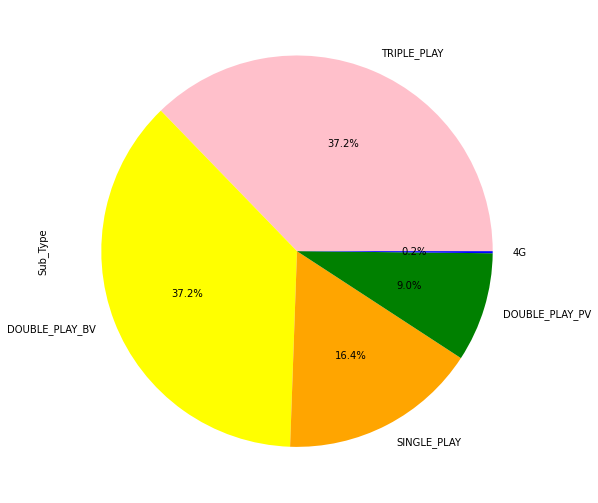

In [624]:
usage_df["Sub_Type"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%', colors=['pink','yellow','orange','green','blue'])

## Service Packages and VAS
- categories derived from "Product State Changes" and "VAS" datasets

In [625]:
usage_df = usage_df.merge(megaline_agg_df,how='left', on='ACCOUNT_NUM.hash')

In [626]:
usage_df = usage_df.merge(ftth_agg_df,how='left', on='ACCOUNT_NUM.hash')

In [627]:
usage_df.Package_Type_x.fillna(usage_df.Package_Type_y,inplace=True)
usage_df.is_Promotion_x.fillna(usage_df.is_Promotion_y,inplace=True)
usage_df.drop(["Package_Type_y","is_Promotion_y"],axis=1, inplace=True)
usage_df.rename(columns={"Package_Type_x":"Package_Type","is_Promotion_x":"is_Promotion"},inplace=True)

In [628]:
usage_df = usage_df.merge(lte_agg_df,how='left', on='ACCOUNT_NUM.hash')

In [629]:
usage_df.Package_Type_x.fillna(usage_df.Package_Type_y,inplace=True)
usage_df.is_Promotion_x.fillna(usage_df.is_Promotion_y,inplace=True)
usage_df.drop(["Package_Type_y","is_Promotion_y"],axis=1, inplace=True)
usage_df.rename(columns={"Package_Type_x":"Package_Type","is_Promotion_x":"is_Promotion"},inplace=True)

In [630]:
usage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42594 entries, 0 to 42593
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ACCOUNT_NUM.hash            42594 non-null  object 
 1   Voice_INCOMING_Categorical  42594 non-null  object 
 2   Voice_INCOMING_Scaled       42594 non-null  float64
 3   Voice_INCOMING_Outlier      42594 non-null  object 
 4   Location_Identifier         39282 non-null  object 
 5   Location_Node               39282 non-null  object 
 6   Package_Type_and_Medium     39282 non-null  object 
 7   Model                       39282 non-null  object 
 8   Service_Status              39282 non-null  object 
 9   Voice_OUTGOING_Categorical  41333 non-null  object 
 10  Voice_OUTGOING_Scaled       41333 non-null  float64
 11  Voice_OUTGOING_Outlier      41333 non-null  object 
 12  IDD_INCOMING_Categorical    10723 non-null  object 
 13  IDD_INCOMING_Scaled         107

In [104]:
vas_agg_df.rename(columns={"Package":"VAS_Package","Month_Subscribed":"VAS_Month_Subscribed","Rental":"VAS_Rental",\
                          "One_Time_Charge":"VAS_One_Time_Charge"},inplace=True)

In [105]:
usage_df = usage_df.merge(vas_agg_df,how='left', on='ACCOUNT_NUM.hash')

In [106]:
usage_df.Package_Type_x.fillna(usage_df.Package_Type_y,inplace=True)

In [107]:
usage_df["MEDIUM"] = usage_df.apply(lambda x:connect_medium(x["MEDIUM_x"],x["MEDIUM_y"]),axis=1)

In [108]:
usage_df.drop(["Package_Type_y","MEDIUM_y","MEDIUM_x"],axis=1, inplace=True)
usage_df.rename(columns={"Package_Type_x":"Package_Type"},inplace=True)

In [109]:
usage_df["MEDIUM"] = usage_df["MEDIUM"].apply(lambda x: str(x).replace("[","").replace("]","").replace("[]","").replace("'","").replace('"',''))

## Subscription upgrades and Downgrades

In [110]:
promo_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ACCOUNT_NUM.hash   758 non-null    object
 1   Sub_Update_Date    758 non-null    object
 2   Sub_Update_Status  758 non-null    object
 3   Sub_Update         758 non-null    object
dtypes: object(4)
memory usage: 23.8+ KB


In [111]:
usage_df = usage_df.merge(promo_change_df,how='left', on='ACCOUNT_NUM.hash')

In [112]:
usage_df[["Sub_Update_Status","Sub_Update"]].value_counts()

Sub_Update_Status    Sub_Update                      
Promotion Downgrade  DOUBLE_PLAY_BV -> SINGLE_PLAY       129
Promotion Upgrade    DOUBLE_PLAY_PV -> TRIPLE_PLAY       127
                     SINGLE_PLAY -> DOUBLE_PLAY_BV       109
Promotion Downgrade  TRIPLE_PLAY -> DOUBLE_PLAY_PV        72
Promotion Upgrade    DOUBLE_PLAY_BV -> TRIPLE_PLAY        69
                     SINGLE_PLAY -> DOUBLE_PLAY_PV        62
Promotion Downgrade  TRIPLE_PLAY -> SINGLE_PLAY           32
Promotion Upgrade    SINGLE_PLAY -> TRIPLE_PLAY           25
Promotion Downgrade  DOUBLE_PLAY_PV -> SINGLE_PLAY        21
                     TRIPLE_PLAY -> DOUBLE_PLAY_BV        12
Promotion Upgrade    4G -> 4G                              1
                     DOUBLE_PLAY_PV -> DOUBLE_PLAY_BV      1
dtype: int64

<AxesSubplot:ylabel='None'>

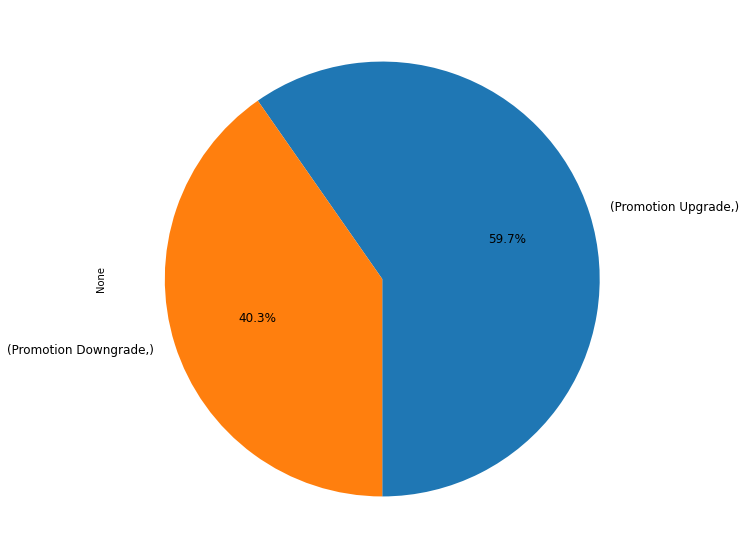

In [113]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
usage_df[["Sub_Update_Status"]].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12)

## BB Extra GB Purchased

In [114]:
extra_GB_df.drop(["Unnamed: 0"],axis=1, inplace=True)
extra_GB_df.rename(columns={"Month_Subscribed":"BB_Extra_GB_Purchased_Month","Rental":"BB_Extra_GB_Rental"}, inplace=True)

In [115]:
extra_GB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ACCOUNT_NUM.hash             7679 non-null   object 
 1   VAS                          7679 non-null   object 
 2   BB_Extra_GB_Purchased_Month  7679 non-null   object 
 3   BB_Extra_GB_Rental           2307 non-null   float64
dtypes: float64(1), object(3)
memory usage: 240.1+ KB


In [116]:
extra_GB_df["BB_Extra_GB_Usage_Times"] = 1

In [117]:
extra_GB_agg_df = extra_GB_df.groupby('ACCOUNT_NUM.hash', as_index=False).agg(list)

In [118]:
extra_GB_agg_df['BB_Extra_GB_Usage_Times'] = extra_GB_agg_df.apply(lambda x: len(x['BB_Extra_GB_Usage_Times']), axis=1)

In [119]:
def list_zipper(list1,list2):
    return dict(zip(list1,list2))

In [120]:
extra_GB_agg_df['BB_Extra_GB_Month_vs_Rental'] = extra_GB_agg_df.apply(lambda x: list_zipper(x['BB_Extra_GB_Purchased_Month'],x['BB_Extra_GB_Rental']), axis=1)

In [121]:
extra_GB_agg_df.drop(["BB_Extra_GB_Purchased_Month","BB_Extra_GB_Rental","VAS"],axis=1, inplace=True)

In [122]:
scaler = MinMaxScaler()
extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"] = scaler.fit_transform(extra_GB_agg_df["BB_Extra_GB_Usage_Times"].values.reshape(-1,1))

In [123]:
extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"] = extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"].apply(lambda x: 0.01 if x==0.0 else x)

In [124]:
extra_GB_agg_df["BB_Extra_GB_Purchased_Scaled"].describe()

count    1527.000000
mean        0.013688
std         0.038370
min         0.001431
25%         0.010000
50%         0.010000
75%         0.010000
max         1.000000
Name: BB_Extra_GB_Purchased_Scaled, dtype: float64

In [125]:
# binning
bins = [0, 0.33, 0.66,1]
labels = ['LOW','MEDIUM','HIGH']
extra_GB_agg_df['BB_Extra_GB_Purchase_Categorical'] = pd.cut(extra_GB_agg_df['BB_Extra_GB_Purchased_Scaled'], bins=bins, labels=labels)

In [126]:
extra_GB_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1527 entries, 0 to 1526
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   ACCOUNT_NUM.hash                  1527 non-null   object  
 1   BB_Extra_GB_Usage_Times           1527 non-null   int64   
 2   BB_Extra_GB_Month_vs_Rental       1527 non-null   object  
 3   BB_Extra_GB_Purchased_Scaled      1527 non-null   float64 
 4   BB_Extra_GB_Purchase_Categorical  1527 non-null   category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 61.3+ KB


In [127]:
usage_df = usage_df.merge(extra_GB_agg_df,how='left', on='ACCOUNT_NUM.hash')

#### Adding Extra GB Detailed DF

In [128]:
extra_GB_detailed_agg_df = extra_GB_detailed_df[["ACCOUNT_NUM.hash","GB_AMOUNT"]].groupby('ACCOUNT_NUM.hash', as_index=False).agg(sum)

In [129]:
extra_GB_detailed_agg_df.rename(columns={"GB_AMOUNT":"BB_Extra_GB_Amount"},inplace=True)

In [130]:
extra_GB_detailed_agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 0 to 612
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ACCOUNT_NUM.hash    613 non-null    object
 1   BB_Extra_GB_Amount  613 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


In [131]:
usage_df = usage_df.merge(extra_GB_detailed_agg_df,how='left', on='ACCOUNT_NUM.hash')

### Note
- Considered Extra GB Purchased time to build rating as there are no enough datsa about rentals

## PeoTV Extra Channels Purchased

In [132]:
extra_Peo_df.drop(["Unnamed: 0"],axis=1, inplace=True)
extra_Peo_df.rename(columns={"Month_Subscribed":"Peo_Extra_Channels_Purchased_Month","Rental":"Peo_Extra_Channels_Rental"}, inplace=True)

In [133]:
extra_Peo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   ACCOUNT_NUM.hash                    498 non-null    object
 1   Package                             498 non-null    object
 2   Peo_Extra_Channels_Purchased_Month  498 non-null    object
 3   Peo_Extra_Channels_Rental           498 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.7+ KB


In [134]:
len(extra_Peo_df["ACCOUNT_NUM.hash"].unique())

51

In [135]:
extra_Peo_agg_df = extra_Peo_df.groupby('ACCOUNT_NUM.hash', as_index=False).agg(list)

In [136]:
extra_Peo_agg_df['Peo_Extra_Channels_Cumulative_Rental'] = extra_Peo_agg_df.apply(lambda x: sum(x['Peo_Extra_Channels_Rental']), axis=1)

In [137]:
extra_Peo_agg_df['Peo_Extra_Channels_Month_vs_Rental'] = extra_Peo_agg_df.apply(lambda x: list_zipper(x['Peo_Extra_Channels_Purchased_Month'],x['Peo_Extra_Channels_Rental']), axis=1)

In [138]:
extra_Peo_agg_df.drop(["Peo_Extra_Channels_Purchased_Month","Peo_Extra_Channels_Rental","Package"],axis=1, inplace=True)

In [139]:
scaler = MinMaxScaler()
extra_Peo_agg_df["Peo_Extra_Channels_Purchased_Scaled"] = scaler.fit_transform(extra_Peo_agg_df["Peo_Extra_Channels_Cumulative_Rental"].values.reshape(-1,1))

In [140]:
extra_Peo_agg_df["Peo_Extra_Channels_Purchased_Scaled"] = extra_Peo_agg_df["Peo_Extra_Channels_Purchased_Scaled"].apply(lambda x: 0.01 if x==0.0 else x)

In [141]:
extra_Peo_agg_df["Peo_Extra_Channels_Purchased_Scaled"].describe()

count    51.000000
mean      0.217098
std       0.170157
min       0.010000
25%       0.087912
50%       0.197802
75%       0.285714
max       1.000000
Name: Peo_Extra_Channels_Purchased_Scaled, dtype: float64

In [142]:
# binning
bins = [0, 0.33, 0.66,1]
labels = ['LOW','MEDIUM','HIGH']
extra_Peo_agg_df['Peo_Extra_Channels_Purchased_Categorical'] = pd.cut(extra_Peo_agg_df['Peo_Extra_Channels_Purchased_Scaled'], bins=bins, labels=labels)

In [ ]:
extra_Peo_agg_df.info()

In [ ]:
usage_df = usage_df.merge(extra_Peo_agg_df,how='left', on='ACCOUNT_NUM.hash')

## Payment and Billing Info

# Deriving Contextual Features

## Socio-Economic features

### Having an Insurance?

In [702]:
def having_insurance(vas):
    insurrence_VAS = ["Telehealth","Basic4 TeleLife","Plus4 TeleLife","Plus1 TeleLife","Basic1 TeleLife","Basic2 TeleLife"]
    if not isinstance(vas,float):
        for s in insurrence_VAS:
            if s in vas:
                return "YES"

In [703]:
usage_df["Having_Insurance"] = usage_df.apply(lambda x: having_insurance(x["VAS_Package"]), axis=1)

### Household types
- Senior Citizen
  - Age > 55 years (demographics)
  - Peo_TV_Usage - High, Packages: PEO_RELIGIOUS_PACKAGE, PRANAMA
  - Voice call usage - high (in country, europian country, australia,US, canada)
  - Having Insurance: YES
- Kids at Home
  - Age > 30 years (assuming parents)
  - Peo TV Usage - High, packages: PEO_FAMILY, DOUBLEPROMO, PEO_TITANIUM, PEO_GOLD
  - Peo TV VAS: PeoTVGo_Channel Package (Extra Channels purchase)
  - BB Usage: Medium/ High
  - VAS - Sisu_Connect, Edu Lite
- Student (High school/University), Teenagers
  - Age < 27 (demographics)
  - Peo TV Usage - Medium/High packages: PEO_SILVER_PLUS, PEO_SILVER_PLUS_FTTH, PEO_ENTERTAINMENT, PEO_TITANIUM, DOUBLEPROMO, LEISURE_SPORTS
  - BB Usage - High **
  - Extra GB Purchase (High)
  - VAS - Meet Lite, Meet Max 
  - Peo TV VAS: E_Video_on_Demand
  - BB_VAS:  BB_YouTube Bundle, BB_ Entertainment Unlimited,  BB_Messenger Bundle
- Working Professional
  - Age > 22, < 55 (demographics)
  - Peo TV Usage - Medium/High packages: PEO_SILVER_PLUS, PEO_SILVER_PLUS_FTTH, PEO_FAMILY, SLT_STAFF_PEO_UNNATHAM_FTTH, SLT_STAFF_TRIPLE_PLAY, NEW_SLT_STAFF_PACKAGE, BOC
  - BB Usage - High **
  - Extra GB Purchase (all)
  - VAS - Meet Lite, Meet Max, AB_Service Vacation, AB_Referral offer Discount, AB_Citylink Loyalty Rewards
- Family Member Abroad
  - IDD Usage : High
  - IDD Calling Country : Europe/ UAE/ Australia/ Canada/ South and east Asia **
- Race: Tamil
   - Peo TV Usage - PEO_UNNATHAM, PEO_UTHAYAM, SLT_STAFF_PEO_UNNATHAM_FTTH
- Abroad person: country/ countries

## Adding Socio Feature Cols

In [704]:
def make_categorical(val):
    if val>=0.5:
        return "YES"

#### Having a Senior Citizen

In [705]:
def senior_citizen(age, peo_tv_cat, peo_tv_package, voice_call_cat, having_insurrance):
    prob = 0.0
    peo_packages = [ "PEO_RELIGIOUS_PACKAGE", "PRANAMA"]
    if age>= 55:
        prob += 0.3
    if peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    if voice_call_cat == "MEDIUM":
        prob += 0.1
    if voice_call_cat == "HIGH":
        prob += 0.2
    if having_insurrance == "YES":
        prob += 0.5
    return prob

In [706]:
# test
senior_citizen(56,"HIGH",["PEO_RELIGIOUS_PACKAGE"],"MEDIUM",None)

0.6

In [707]:
usage_df["Having_Senior_Citizen_Scaled"] = usage_df.apply(lambda x: senior_citizen(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["VOICE_Categorical"],x["Having_Insurance"]), axis=1)

In [708]:
usage_df["Having_Senior_Citizen"] = usage_df.apply(lambda x: make_categorical(x["Having_Senior_Citizen_Scaled"]), axis=1)

#### Having Kids at Home

In [709]:
def kids_at_home(age, peo_tv_cat, peo_tv_package,bb_usage,vas):
    prob = 0.0
    peo_packages = ["PEO_FAMILY", "DOUBLEPROMO", "PEO_TITANIUM", "PEO_GOLD","PEO_FAMILY"]
    peo_vas = ["PeoTVGo Channel Package"]
    all_vas = ["Sisu Connect", "Edu Lite"]
    if age>= 30:
        prob += 0.2
    if peo_tv_cat == "HIGH":
        prob += 0.25
        if not isinstance(peo_tv_package, float):
            for pack in peo_packages:
                if pack in peo_tv_package:
                    prob += 0.2
        if not isinstance(vas, float):
            for pack in peo_vas:
                if pack in vas:
                    prob += 0.2
    if not isinstance(vas, float):
        for pack in all_vas:
            if pack in vas:
                prob += 0.5
    if bb_usage == "MEDIUM" or bb_usage == "HIGH":
        prob += 0.1
    return prob

In [710]:
usage_df["Having_Kids_at_Home_Scaled"] = usage_df.apply(lambda x: kids_at_home(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["BB_Categorical"],x["VAS_Package"]), axis=1)

In [711]:
usage_df["Having_Kids_at_Home"] = usage_df.apply(lambda x: make_categorical(x["Having_Kids_at_Home_Scaled"]), axis=1)

#### Home Business/ SMEs

In [714]:
def smes(bb_cat,bb_package, extra_gb_cat, vas):
    prob = 0.0
    bb_packages=["4G Biz Pal","Any Glam","Any Storm","Any Spike","z Sales End_Office","Web Life",
                 "Web Inspire","Any Xtreme","Web Pro","Web Champ","Web Master"]
    all_vas = ["BB YouTube Bundle",'Meet Max',"BB Personal Storage"]
    if bb_cat == "MEDIUM":
        prob += 0.1
    if bb_cat == "HIGH":
        prob += 0.3
    if bb_cat == "HIGH":
        if not isinstance(bb_package, float):
            for pack in bb_packages:
                if pack in bb_package:
                    prob += 0.2
    if not isinstance(vas, float):
        for pack in all_vas:
            if pack in vas:
                prob += 0.2
    if extra_gb_cat == "LOW":
        prob +=0.1
    if extra_gb_cat == "MEDIUM" or extra_gb_cat == "HIGH":
        prob += 0.3
    return prob

In [715]:
usage_df["SMEs_Scaled"] = usage_df.apply(lambda x: smes(x["BB_Categorical"],x["BB_Package"],x["BB_Extra_GB_Purchase_Categorical"],x["VAS_Package"]), axis=1)

In [716]:
usage_df["SMEs"] = usage_df.apply(lambda x: make_categorical(x["SMEs_Scaled"]), axis=1)

#### Teenagers and Students (age 16-26)

In [717]:
def teenage_students(age, peo_tv_cat, peo_tv_package,bb_cat, bb_package, extra_gb_cat, vas):
    prob = 0.0
    peo_packages = [ "PEO_TITANIUM", "LEISURE_SPORTS","PEO_ENTERTAINMENT"]
    bb_packages=["Student Package 1","Student Package 2","Any Flix","BB_Netflix Unlimited","Web Booster","Any Tide"]
    peo_vas = ["Video on Demand"]
    bb_vas = ["BB YouTube Bundle", "BB Entertainment Unlimited", "BB Messenger Bundle"]
    all_vas = ['Meet Lite', 'Meet Max']
    if age<= 26:
        prob += 0.3
    if peo_tv_cat == "MEDIUM":
        prob += 0.1
    if peo_tv_cat == "HIGH":
        prob += 0.2
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for pack in peo_packages:
                if pack in peo_tv_package:
                    prob += 0.2
        if not isinstance(vas, float):
            for pack in peo_vas:
                if pack in vas:
                    prob += 0.2
    if bb_cat == "MEDIUM":
        prob += 0.1
    if bb_cat == "HIGH":
        prob += 0.3
    if bb_cat == "HIGH" or bb_cat == "MEDIUM":
        if not isinstance(vas, float):
            for pack in bb_vas:
                if pack in vas:
                    prob += 0.2
        if not isinstance(bb_package, float):
            for pack in bb_packages:
                if pack in bb_package:
                    prob += 0.2
    if not isinstance(vas, float):
        for pack in all_vas:
            if pack in vas:
                prob += 0.2
    if extra_gb_cat == "LOW":
        prob +=0.1
    if extra_gb_cat == "MEDIUM" or extra_gb_cat == "HIGH":
        prob += 0.3
    return prob

In [718]:
usage_df["Having_Teenagers_Students_Scaled"] = usage_df.apply(lambda x: teenage_students(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["BB_Categorical"],x["BB_Package"],x["BB_Extra_GB_Purchase_Categorical"],x["VAS_Package"]), axis=1)

In [719]:
usage_df["Having_Teenagers_Students"] = usage_df.apply(lambda x: make_categorical(x["Having_Teenagers_Students_Scaled"]), axis=1)

### Working Professionals

In [720]:
def working_professionals(age, peo_tv_cat, peo_tv_package, bb_cat, bb_package, extra_gb_cat, vas):
    prob = 0.0
    peo_packages = ["PEO_SILVER_PLUS", "PEO_FAMILY","PEO_SILVER_PLUS_FTTH", "SLT_STAFF_PEO_UNNATHAM_FTTH", "SLT_STAFF_TRIPLE_PLAY","NEW_SLT_STAFF_PACKAGE","BOC"]
    bb_packages= ["z Sales End_SLT Staff Home","Abhimaana","SLT Staff Web Family Plus","z Sales End_SLT Staff Home", 'Web Family Xtra']
    bb_vas = ["BB Personal Storage"]
    all_vas = ['Meet Lite', 'Meet Max','AB Referral offer Discount', 'AB Service Vacation','AB Citylink Loyalty Rewards']
    if age> 21 and age<56:
        prob += 0.2
    if peo_tv_cat == "MEDIUM":
        prob += 0.1
    if peo_tv_cat == "HIGH":
        prob += 0.1
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for pack in peo_packages:
                if pack in peo_tv_package:
                    prob += 0.2
    if bb_cat == "MEDIUM":
        prob += 0.1
    if bb_cat == "HIGH":
        prob += 0.3
    if bb_cat == "HIGH" or bb_cat == "MEDIUM":
        if not isinstance(vas, float):
            for pack in bb_vas:
                if pack in vas:
                    prob += 0.2
        if not isinstance(bb_package, float):
            for pack in bb_packages:
                if pack in bb_package:
                    prob += 0.2
    if not isinstance(vas, float):
        for pack in all_vas:
            if pack in vas:
                prob += 0.25
    if extra_gb_cat == "LOW":
        prob +=0.1
    if extra_gb_cat == "MEDIUM" or extra_gb_cat == "HIGH":
        prob += 0.3
    return prob

In [721]:
usage_df["Having_Working_Professionals_Scaled"] = usage_df.apply(lambda x: working_professionals(x["AGE"],x["PEO_TV_Categorical"],x["Peo_TV_Package"],x["BB_Categorical"],x["BB_Package"],x["BB_Extra_GB_Purchase_Categorical"],x["VAS_Package"]), axis=1)

In [722]:
usage_df["Having_Working_Professionals"] = usage_df.apply(lambda x: make_categorical(x["Having_Working_Professionals_Scaled"]), axis=1)

### Family Member Abroad

In [723]:
def family_member_abroad(idd_cat, incoming_country, outgoing_country):
    prob = 0.0
    countries = ["United Arab Emirates", "Australia - Mobile","UK - Mobile", "New Zealand", "Hong Kong","Maldive Islands","Singapore",
                 "India","Saudi Arabia - Mobile","Australia","China - Mobile","Maldive Islands",
                 "Israel - Mobile","Jordan - Mobile","U.K.","U.S.A","France","Italy - Mobile","Malaysia - Mobile","Bangladesh - Mobile"
                ,"Germany","Philippines - Mobile","Italy","Israel","Saudi Arabia","Pakistan - Mobile","Pakistan","Japan","Kuwait -Mobile"
                ,"Oman-Mobile ","France - Mobile","Canada","Japan - Mobile","United Arab Emirates  - Mobile","Bahrain - Mobile","Bahrain"
                ,"Cyprus - Mobile","Cyprus","Barbados","Korea Republic Of","Switzerland - Mobile","Indonesia - Mobile","Qatar - Mobile"
                ,"Qatar","Romania","Germany - Mobile","Belgium","Netherlands"]
    if idd_cat == "LOW":
        prob += 0.1
    if idd_cat == "MEDIUM":
        prob += 0.3
    if idd_cat == "HIGH":
        prob += 0.5
    if not isinstance(idd_cat, float):
        for country in countries:
            if not isinstance(incoming_country, float) and country in incoming_country:
                prob += 0.25
            elif not isinstance(outgoing_country, float) and country in outgoing_country:
                prob += 0.25
    return prob

In [724]:
usage_df["Having_Family_Member_Abroad_Scaled"] = usage_df.apply(lambda x: family_member_abroad(x["IDD_Overall_Categorical"],x["IDD_incoming_country"],x["IDD_outgoing_country"]), axis=1)

In [725]:
usage_df["Having_Family_Member_Abroad"] = usage_df.apply(lambda x: make_categorical(x["Having_Family_Member_Abroad_Scaled"]), axis=1)

### Race: Tamil

In [726]:
def tamil_check(peo_cat, peo_package):
    packages = ["PEO_UNNATHAM", "PEO_UTHAYAM", "SLT_STAFF_PEO_UNNATHAM_FTTH"]
    if not isinstance(peo_cat, float):
        for pack in packages:
            if not isinstance(peo_package, float) and pack in peo_package:
                return "YES"

In [727]:
usage_df["Tamil_Customer"] = usage_df.apply(lambda x: tamil_check(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

## Adding Social feature derivable assumption cols

In [728]:
def senior_citizen_peo_packages(peo_tv_cat,peo_tv_package):
    prob = 0.0
    peo_packages = ["PEO_RELIGIOUS_PACKAGE", "PRANAMA"]
    if peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    return prob

In [729]:
usage_df["Peo_Packages_if_Senior_Citizen"] = usage_df.apply(lambda x: senior_citizen_peo_packages(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

In [730]:
def kids_peo_packages(peo_tv_cat,peo_tv_package):
    prob = 0.0
    peo_packages =  ["PEO_FAMILY", "DOUBLEPROMO", "PEO_TITANIUM", "PEO_GOLD","PEO_FAMILY"]
    if peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    return prob

In [731]:
usage_df["Peo_Packages_if_Kids"] = usage_df.apply(lambda x: kids_peo_packages(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

In [732]:
def teenager_student_peo_packages(peo_tv_cat,peo_tv_package):
    prob = 0.0
    peo_packages = ["DOUBLEPROMO", "PEO_TITANIUM", "LEISURE_SPORTS","PEO_ENTERTAINMENT"]
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    return prob

In [733]:
usage_df["Peo_Packages_if_Teenager_Students"] = usage_df.apply(lambda x: teenager_student_peo_packages(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

In [734]:
def working_professional_peo_packages(peo_tv_cat,peo_tv_package):
    prob = 0.0
    peo_packages = ["PEO_SILVER_PLUS", "PEO_FAMILY","PEO_SILVER_PLUS_FTTH", "SLT_STAFF_PEO_UNNATHAM_FTTH", "SLT_STAFF_TRIPLE_PLAY","NEW_SLT_STAFF_PACKAGE","BOC"]
    if peo_tv_cat == "MEDIUM" or peo_tv_cat == "HIGH":
        if not isinstance(peo_tv_package, float):
            for vas in peo_packages:
                if vas in peo_tv_package:
                    prob += 0.2
    return prob

In [735]:
usage_df["Peo_Package_if_Working_Professionals"] = usage_df.apply(lambda x: working_professional_peo_packages(x["PEO_TV_Categorical"],x["Peo_TV_Package"]), axis=1)

In [736]:
def working_professional_bb_packages(bb_cat,bb_package):
    prob = 0.0
    bb_packages= ["z Sales End_SLT Staff Home","Abhimaana","SLT Staff Web Family Plus","z Sales End_SLT Staff Home", 'Web Family Xtra']
    if bb_cat == "MEDIUM" or bb_cat == "HIGH":
        if not isinstance(bb_package, float):
            for vas in bb_packages:
                if vas in bb_package:
                    prob += 0.2
    return prob

In [737]:
usage_df["BB_Package_if_Working_Professionals"] = usage_df.apply(lambda x: working_professional_bb_packages(x["BB_Categorical"],x["BB_Package"]), axis=1)

In [738]:
def teenager_student_bb_packages(bb_cat,bb_package):
    prob = 0.0
    bb_packages=["Student Package 1","Student Package 2","Any Flix","BB_Netflix Unlimited","Web Booster","Any Tide"]
    if bb_cat == "MEDIUM" or bb_cat == "HIGH":
        if not isinstance(bb_package, float):
            for vas in bb_packages:
                if vas in bb_package:
                    prob += 0.2
    return prob

In [739]:
usage_df["BB_Packages_if_Teenager_Students"] = usage_df.apply(lambda x: teenager_student_bb_packages(x["BB_Categorical"],x["BB_Package"]), axis=1)

In [740]:
def sme_bb_packages(bb_cat,bb_package):
    prob = 0.0
    bb_packages=["4G Biz Pal","Any Glam","Any Storm","Any Spike","z Sales End_Office","Web Life",
                 "Web Inspire","Any Xtreme","Web Pro","Web Champ","Web Master"]
    if bb_cat == "HIGH":
        if not isinstance(bb_package, float):
            for vas in bb_packages:
                if vas in bb_package:
                    prob += 0.2
    return prob

In [741]:
usage_df["BB_Packages_if_SMEss"] = usage_df.apply(lambda x: sme_bb_packages(x["BB_Categorical"],x["BB_Package"]), axis=1)

In [742]:
def kids_vas_packages(peo_cat,vas):
    prob = 0.0
    peo_vas = ["PeoTVGo Channel Package"]
    vas_packages = ["Sisu Connect", "Edu Lite"]
    if peo_cat == "HIGH":
        if not isinstance(vas, float):
            for s in peo_vas:
                if s in vas:
                    prob += 0.2
    if not isinstance(vas, float):
        for s in vas_packages:
            if s in vas:
                prob += 0.5
    return prob

In [743]:
usage_df["VAS_if_Kids"] = usage_df.apply(lambda x: kids_vas_packages(x["PEO_TV_Categorical"],x["VAS_Package"]), axis=1)

In [744]:
def teenager_student_vas_packages(peo_cat,bb_cat,vas):
    prob = 0.0
    peo_vas = ["Video on Demand"]
    bb_vas = ["BB YouTube Bundle", "BB Entertainment Unlimited", "BB Messenger Bundle"]
    vas_packages = ['Meet Lite', 'Meet Max']
    if peo_cat == "MEDIUM" or peo_cat == "HIGH":
        if not isinstance(vas, float):
            for v in peo_vas:
                if v in vas:
                    prob += 0.2
    if bb_cat == "MEDIUM" or bb_cat == "HIGH":
        if not isinstance(vas, float):
            for v in bb_vas:
                if v in vas:
                    prob += 0.2
    if not isinstance(vas, float):
        for v in vas_packages:
            if v in vas:
                prob += 0.3
    return prob

In [745]:
usage_df["VAS_if_Teenager_Students"] = usage_df.apply(lambda x: teenager_student_vas_packages(x["PEO_TV_Categorical"],x["BB_Categorical"],x["VAS_Package"]), axis=1)

In [746]:
def working_professional_vas_packages(bb_cat,vas):
    prob = 0.0
    bb_vas = ["BB Personal Storage"]
    vas_packages = ['AB Referral offer Discount', 'AB Service Vacation',
                    'AB Citylink Loyalty Rewards','Meet Lite', 'Meet Max']
    if bb_cat == "MEDIUM" or bb_cat == "HIGH":
        if not isinstance(vas, float):
            for v in bb_vas:
                if v in vas:
                    prob += 0.2
    if not isinstance(vas, float):
        for v in vas_packages:
            if v in vas:
                prob += 0.25
    return prob

In [747]:
usage_df["VAS_if_Working_Professionals"] = usage_df.apply(lambda x: working_professional_vas_packages(x["BB_Categorical"],x["VAS_Package"]), axis=1)

In [748]:
def family_member_abroad_idd_countries(idd_cat,incoming_country,outgoing_country):
    prob = 0.0
    countries = ["United Arab Emirates", "Australia - Mobile","UK - Mobile", "New Zealand", "Hong Kong","Maldive Islands","Singapore",
                 "India","Saudi Arabia - Mobile","Australia","China - Mobile","Maldive Islands",
                 "Israel - Mobile","Jordan - Mobile","U.K.","U.S.A","France","Italy - Mobile","Malaysia - Mobile","Bangladesh - Mobile"
                ,"Germany","Philippines - Mobile","Italy","Israel","Saudi Arabia","Pakistan - Mobile","Pakistan","Japan","Kuwait -Mobile"
                ,"Oman-Mobile ","France - Mobile","Canada","Japan - Mobile","United Arab Emirates  - Mobile","Bahrain - Mobile","Bahrain"
                ,"Cyprus - Mobile","Cyprus","Barbados","Korea Republic Of","Switzerland - Mobile","Indonesia - Mobile","Qatar - Mobile"
                ,"Qatar","Romania","Germany - Mobile","Belgium","Netherlands"]
    if not isinstance(idd_cat, float):
        if idd_cat == "MEDIUM" or idd_cat == "HIGH":
            for country in countries:
                if not isinstance(incoming_country, float) and country in incoming_country:
                    prob += 0.25
                elif not isinstance(outgoing_country, float) and country in outgoing_country:
                    prob += 0.25
    return prob

In [749]:
usage_df["IDD_if_Family_Member_Abroad"] = usage_df.apply(lambda x: family_member_abroad_idd_countries(x["IDD_Overall_Categorical"],x["IDD_incoming_country"],x["IDD_outgoing_country"]), axis=1)

In [750]:
usage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 2915
Data columns (total 96 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   ACCOUNT_NUM.hash                          2916 non-null   object  
 1   CUSTOMER_REF.hash                         2916 non-null   object  
 2   OFFNET_INCOMING_Scaled                    2916 non-null   float64 
 3   OFFNET_INCOMING_Categorical               2916 non-null   object  
 4   OFFNET_INCOMING_Outlier                   2916 non-null   object  
 5   OFFNET_OUTGOING_Categorical               2809 non-null   object  
 6   OFFNET_OUTGOING_Scaled                    2809 non-null   float64 
 7   OFFNET_OUTGOING_Outlier                   2809 non-null   object  
 8   ONNET_INCOMING_Categorical                2833 non-null   object  
 9   ONNET_INCOMING_Scaled                     2833 non-null   float64 
 10  ONNET_INCOMING_Outlier  

## ToDo - Deriving context
- Payment Patterns & information : Economical state/ payment type preferred/ payment state (good/bad/avarage)
- Time context - BB Usage Time/ PeoTV Watch Time/ Call Time/ IDD Call Time analysis
- Upgrade/ Downgrade purpose assumption

In [751]:
usage_df.to_csv("data/user_profile/prepared/User_Profile.csv")

# User Profile -Analysis

### Subscription Changes

<AxesSubplot:ylabel='None'>

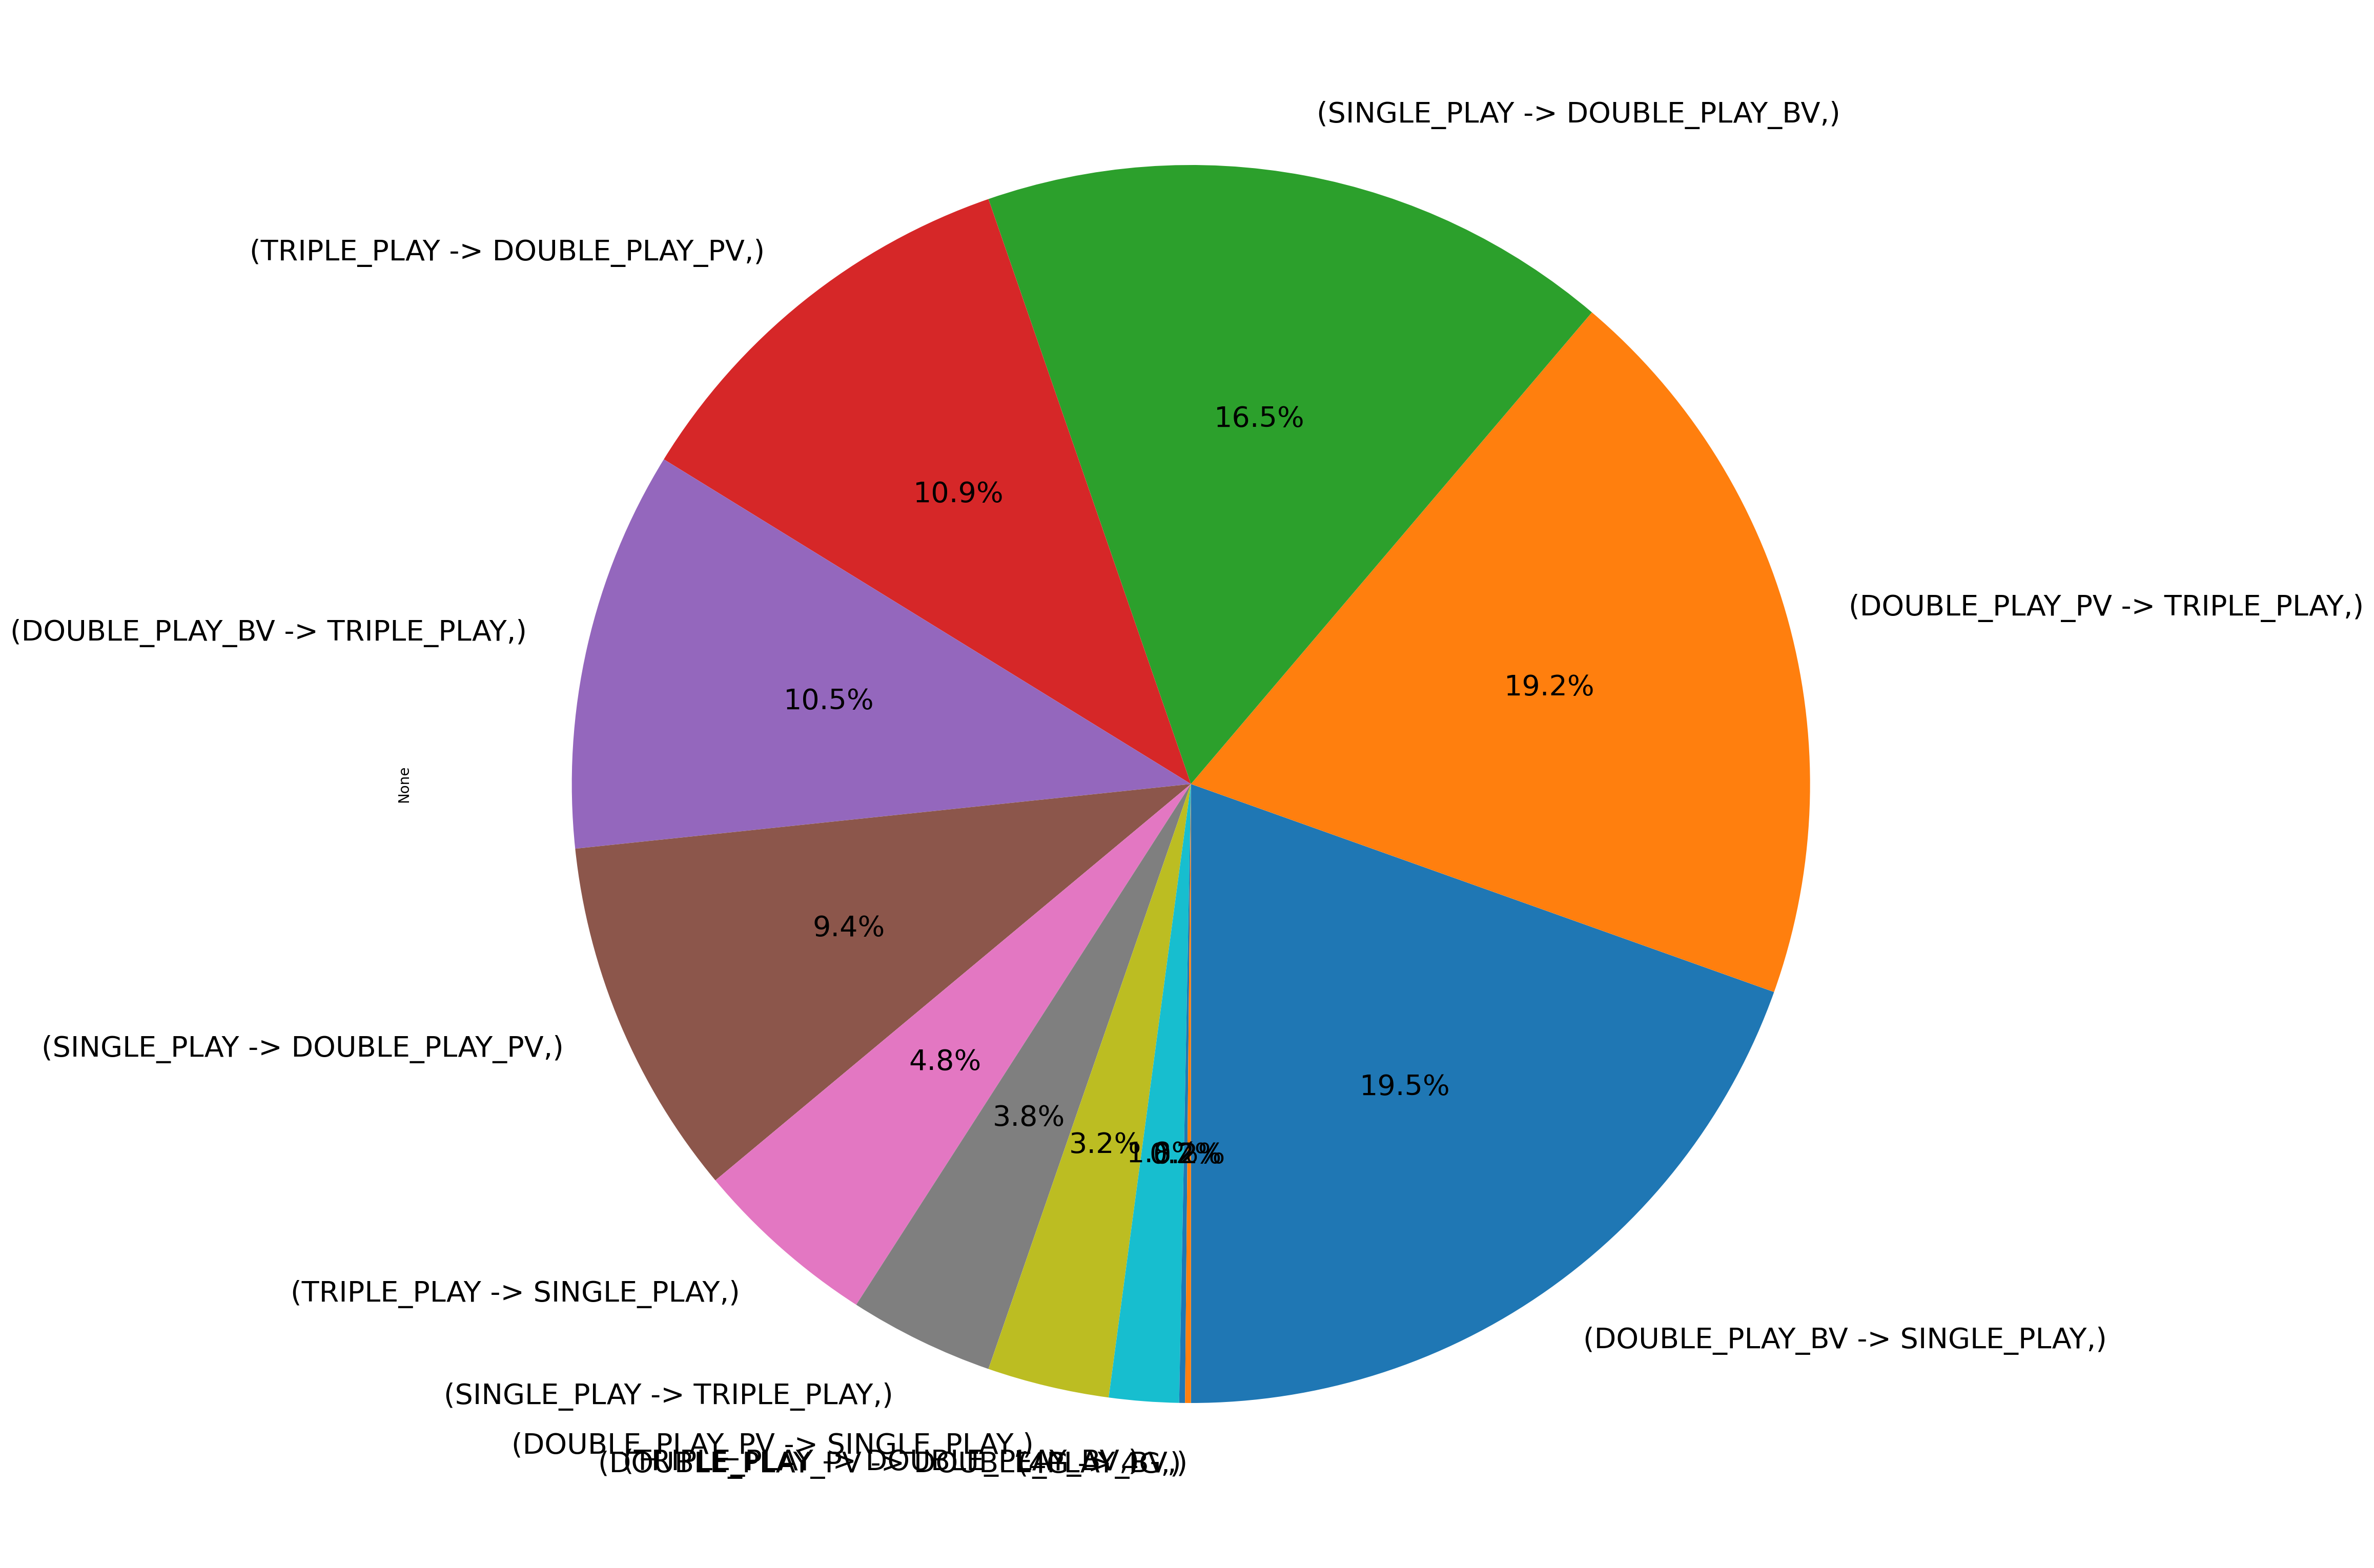

In [752]:
fig = plt.figure(figsize=(20,20), dpi=200)
ax = plt.subplot(111)

usage_df[["Sub_Update"]].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=20)

### Customers with VAS

In [753]:
usage_df.apply(lambda x: "YES" if  type(x["VAS_Package"]) == str else "NO", axis=1).value_counts()

NO     1954
YES     962
dtype: int64

## Customers with Megaline Packages

In [754]:
usage_df.apply(lambda x: "YES" if  type(x["Megaline_Package"]) == str else "NO", axis=1).value_counts()

YES    2916
dtype: int64

## Customers with FTTH Package

In [755]:
usage_df.apply(lambda x: "YES" if  type(x["FTTH_Package"]) == str else "NO", axis=1).value_counts()

NO     2828
YES      88
dtype: int64

## Customers with PeoTV Packages

In [756]:
peo_tv_users = usage_df.apply(lambda x: "YES" if  type(x["Peo_TV_Package"]) == str else "NO", axis=1)
peo_tv_users.value_counts()

NO     1774
YES    1142
dtype: int64